<a href="https://colab.research.google.com/github/sheemambabu/CMPE-258-Deep-Learning/blob/main/Assignment%203/HW_3_PartC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE-258 Deep Learning
## Homework 3
### By,
### Sheema Murugesh Babu (SJSU-ID: 015217176)



Part c.3) Using pure tensorflow keras linear modules etc., - high level primitives and build neural network - make sure you use the Model subclassing (not the functional api or sequential api) as shown in the slides of the class. 

# Using pure tensorflow:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Generating sample data: 

In [ ]:
n_samples = 200
input_dimensions = 3
output_dimensions = 2

tf.random.set_seed(123)
X = tf.random.uniform((n_samples, input_dimensions), -1, 1)
print('Samples values of x:', X[:3])

weights_true = tf.constant([[5., 1., -5.], [-1., -8., 1.]], dtype=tf.float32)
bias_true = tf.constant([[1], [-1]], dtype=tf.float32)

y_true = tf.matmul(-6 * X ** 2, weights_true, transpose_b=True) + tf.matmul(X, weights_true, transpose_b=True) + tf.transpose(bias_true)

print('Samples values of y:', y_true[:3])
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

Samples values of x: tf.Tensor(
[[-0.7476938   0.14550257 -0.4013734 ]
 [ 0.09236717  0.44103146  0.5779066 ]
 [-0.3846376  -0.03657794  0.30755043]], shape=(3, 3), dtype=float32)
Samples values of y: tf.Tensor(
[[-12.6514845   1.5861797]
 [  7.6096134   3.3410416]
 [ -4.10631     0.3691858]], shape=(3, 2), dtype=float32)
X: (200, 3), weights: (2, 3), bias: (2, 1), y: (200, 2)


# Function plot 3-D data with sklearn TSNE


In [ ]:
def plot_3d(title, X, y, y_pred=None):
  X_tsne = TSNE(n_components = 2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tsne[:, 0], X_tsne[:, 1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
     ax.scatter(X_tsne[:, 0], X_tsne[:, 1], y_pred, label='y_pred', marker = '^')
  plt.legend()
  plt.show()

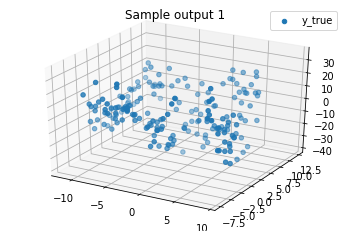

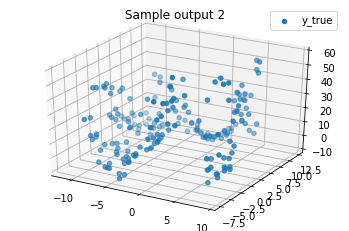

In [ ]:
plot_3d('Sample output 1', X, y_true[:,0])
plot_3d('Sample output 2', X, y_true[:,1])

# Building a neural network


In [ ]:
class NeuralNetwork_Model(tf.keras.Model):
  def __init__(self, n_inputs=3, n_hidden=[2], n_outputs=2, activation_func=None, **kwargs):
    super(NeuralNetwork_Model, self).__init__(**kwargs)
    self.n_inputs = n_inputs
    self.n_hidden = n_hidden
    self.n_outputs = n_outputs

    node_layers = [self.n_inputs] + self.n_hidden + [self.n_outputs]
    
    layers = []
    for i in range(len(node_layers[:-1])):
      if i == len(node_layers[:-1]) - 1:
        layers.append(Dense(node_layers[i + 1]))
      else:
        layers.append(Dense(node_layers[i + 1], activation=activation_func))
    self.layers_ = layers

  def forward(self, X):
    current_output = X
    for l in self.layers_:
      current_output = l(current_output)
    return current_output
  
  def call(self, inputs):
    current_output = X
    for l in self.layers_:
      current_output = l(current_output)
    return current_output
  
  # Training loop over number of epochs
  def fit(self, X, y_true, lr, epochs):
    loss_func  = tf.keras.losses.MeanSquaredError()
    optimizer = tf.keras.optimizers.Adam()
    for i in range(epochs):
      with tf.GradientTape(persistent=True) as tape:
        y_pred = self.forward(X)
        error = loss_func(y_pred, y_true)
        print('MSE: ',error)
      for l in self.layers:
        gradients = tape.gradient(error, l.trainable_weights)
        optimizer.apply_gradients(zip(gradients, l.trainable_weights))

# Hyperparameters

In [ ]:
# Number of Iterations
epochs = 2000

# Learning rate of the algorithm
lr = 0.05

# Input and output size. i.e 3 and 2 relatively
input = X.shape[1]
output = y_true.shape[1]

print(input)
print(output)

3
2


# Training the Neural Network model with ReLU activation function

In [ ]:
model = NeuralNetwork_Model(n_inputs=input, n_hidden=[4, 3], n_outputs=output, activation_func='relu')
print('Neural Network Architecture:')
print(model.layers)

model.fit(X, y_true, lr, epochs)
y_pred = model.forward(X)
err = mean_squared_error(y_true, y_pred)
print('Final MSE with ReLU: {}'.format(err))

Neural Network Architecture:
[<tensorflow.python.keras.layers.core.Dense object at 0x7ff2717d35d0>, <tensorflow.python.keras.layers.core.Dense object at 0x7ff270d6a790>, <tensorflow.python.keras.layers.core.Dense object at 0x7ff270d9fe10>]
MSE:  tf.Tensor(325.85663, shape=(), dtype=float32)
MSE:  tf.Tensor(325.7799, shape=(), dtype=float32)
MSE:  tf.Tensor(325.70813, shape=(), dtype=float32)
MSE:  tf.Tensor(325.63254, shape=(), dtype=float32)
MSE:  tf.Tensor(325.55164, shape=(), dtype=float32)
MSE:  tf.Tensor(325.4643, shape=(), dtype=float32)
MSE:  tf.Tensor(325.371, shape=(), dtype=float32)
MSE:  tf.Tensor(325.27188, shape=(), dtype=float32)
MSE:  tf.Tensor(325.1669, shape=(), dtype=float32)
MSE:  tf.Tensor(325.05612, shape=(), dtype=float32)
MSE:  tf.Tensor(324.93958, shape=(), dtype=float32)
MSE:  tf.Tensor(324.8179, shape=(), dtype=float32)
MSE:  tf.Tensor(324.69125, shape=(), dtype=float32)
MSE:  tf.Tensor(324.55988, shape=(), dtype=float32)
MSE:  tf.Tensor(324.424, shape=(), dty

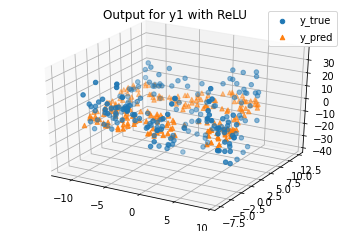

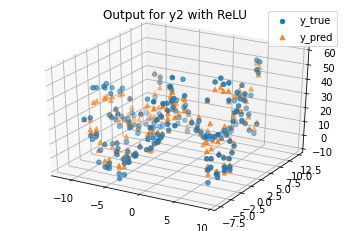

In [ ]:
plot_3d('Output for y1 with ReLU', X, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2 with ReLU', X, y_true[:,1], y_pred[:,1])

# Training the Neural Network model without ReLU activation function

In [ ]:
model = NeuralNetwork_Model(n_inputs=input, n_hidden=[4, 3], n_outputs=output, activation_func=None)
print('Neural Network Architecture:')
print(model)

model.fit(X, y_true, lr, epochs)
y_pred = model.forward(X)

err = mean_squared_error(y_true, y_pred)
print('Final MSE without ReLU: {}'.format(err))

Neural Network Architecture:
MSE:  tf.Tensor(332.5732, shape=(), dtype=float32)
MSE:  tf.Tensor(332.52618, shape=(), dtype=float32)
MSE:  tf.Tensor(332.48203, shape=(), dtype=float32)
MSE:  tf.Tensor(332.43542, shape=(), dtype=float32)
MSE:  tf.Tensor(332.38556, shape=(), dtype=float32)
MSE:  tf.Tensor(332.33218, shape=(), dtype=float32)
MSE:  tf.Tensor(332.27524, shape=(), dtype=float32)
MSE:  tf.Tensor(332.21475, shape=(), dtype=float32)
MSE:  tf.Tensor(332.15085, shape=(), dtype=float32)
MSE:  tf.Tensor(332.08356, shape=(), dtype=float32)
MSE:  tf.Tensor(332.0131, shape=(), dtype=float32)
MSE:  tf.Tensor(331.93954, shape=(), dtype=float32)
MSE:  tf.Tensor(331.86313, shape=(), dtype=float32)
MSE:  tf.Tensor(331.784, shape=(), dtype=float32)
MSE:  tf.Tensor(331.70224, shape=(), dtype=float32)
MSE:  tf.Tensor(331.61804, shape=(), dtype=float32)
MSE:  tf.Tensor(331.53165, shape=(), dtype=float32)
MSE:  tf.Tensor(331.44305, shape=(), dtype=float32)
MSE:  tf.Tensor(331.3525, shape=(), dty

From the above, we can see that the error is larger when ReLU activation is not applied.

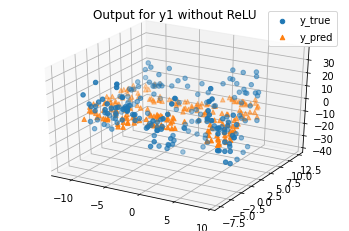

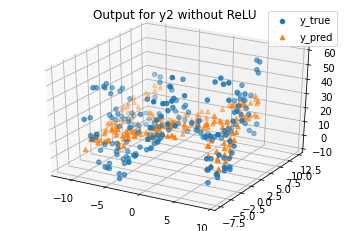

In [ ]:
plot_3d('Output for y1 without ReLU', X, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2 without ReLU', X, y_true[:,1], y_pred[:,1])

## References :

1) Class Slides <br>
2) https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9 <br>
3) https://www.kdnuggets.com/2019/08/numpy-neural-networks-computational-graphs.html <br>
4) https://www.tensorflow.org/guide/intro_to_modules